In [ ]:
#eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
# 1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039148,-122.39544
# 2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,,1.688E+12,America/Los_Angeles,41.03917,-122.39547
# 3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,,1.688E+12,America/Los_Angeles,41.03913,-122.39544
# 4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039177,-122.39542
# 5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688E+12,America/Los_Angeles,41.039182,-122.39544

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

data = {
    'eventId': [1, 2, 3, 4, 5],
    'eventCount': [1, 1, 1, 10, 1],
    'uuid': ['bd7b10e3-9199-3ee8-866b-1a08574fed07'] * 5,
    'eventFlag': [557056, 32768, 32768, 557056, 557056],
    'ipAddress': ['107.242.121.1', None, None, '107.242.121.1', '107.242.121.1'],
    'timestamp': [1.688E+12, 1.688E+12, 1.688E+12, 1.688E+12, 1.688E+12],
    'timezone': ['America/Los_Angeles'] * 5,
    'latitude': [41.039148, 41.03917, 41.03913, 41.039177, 41.039182],
    'longitude': [-122.39544, -122.39547, -122.39544, -122.39542, -122.39544]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,None,1.688000e+12,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,None,1.688000e+12,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039182,-122.39544


Data Cleaning and Preprocessing:

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 eventId       0
eventCount    0
uuid          0
eventFlag     0
ipAddress     2
timestamp     0
timezone      0
latitude      0
longitude     0
dtype: int64


In [ ]:
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
df

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,2023-06-29 00:53:20,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,None,2023-06-29 00:53:20,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,None,2023-06-29 00:53:20,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,2023-06-29 00:53:20,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,2023-06-29 00:53:20,America/Los_Angeles,41.039182,-122.39544


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [ ]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
         eventId  eventCount      eventFlag            timestamp   latitude  \
count  5.000000    5.000000       5.000000                    5   5.000000   
mean   3.000000    2.800000  347340.800000  2023-06-29 00:53:20  41.039161   
min    1.000000    1.000000   32768.000000  2023-06-29 00:53:20  41.039130   
25%    2.000000    1.000000   32768.000000  2023-06-29 00:53:20  41.039148   
50%    3.000000    1.000000  557056.000000  2023-06-29 00:53:20  41.039170   
75%    4.000000    1.000000  557056.000000  2023-06-29 00:53:20  41.039177   
max    5.000000   10.000000  557056.000000  2023-06-29 00:53:20  41.039182   
std    1.581139    4.024922  287164.364229                  NaN   0.000022   

        longitude  
count    5.000000  
mean  -122.395442  
min   -122.395470  
25%   -122.395440  
50%   -122.395440  
75%   -122.395440  
max   -122.395420  
std      0.000018  


In [ ]:
# Distribution of event counts
event_counts_distribution = df['eventCount'].value_counts()
print("Event Counts Distribution:\n", event_counts_distribution)

Event Counts Distribution:
 eventCount
1     4
10    1
Name: count, dtype: int64


User Behavior Analysis:

In [ ]:
# Frequency of events per user
events_per_user = df['uuid'].value_counts()
print("Events per User:\n", events_per_user)
print("--------------------------------------")
# Patterns in event types
event_types = df['eventId'].value_counts()
print("Event Types:\n", event_types)
print("--------------------------------------")

# Distribution of event flags
event_flags_distribution = df['eventFlag'].value_counts()
print("Event Flags Distribution:\n", event_flags_distribution)

Events per User:
 uuid
bd7b10e3-9199-3ee8-866b-1a08574fed07    5
Name: count, dtype: int64
--------------------------------------
Event Types:
 eventId
1    1
2    1
3    1
4    1
5    1
Name: count, dtype: int64
--------------------------------------
Event Flags Distribution:
 eventFlag
557056    3
32768     2
Name: count, dtype: int64


Exploratory Data Analysis (EDA)

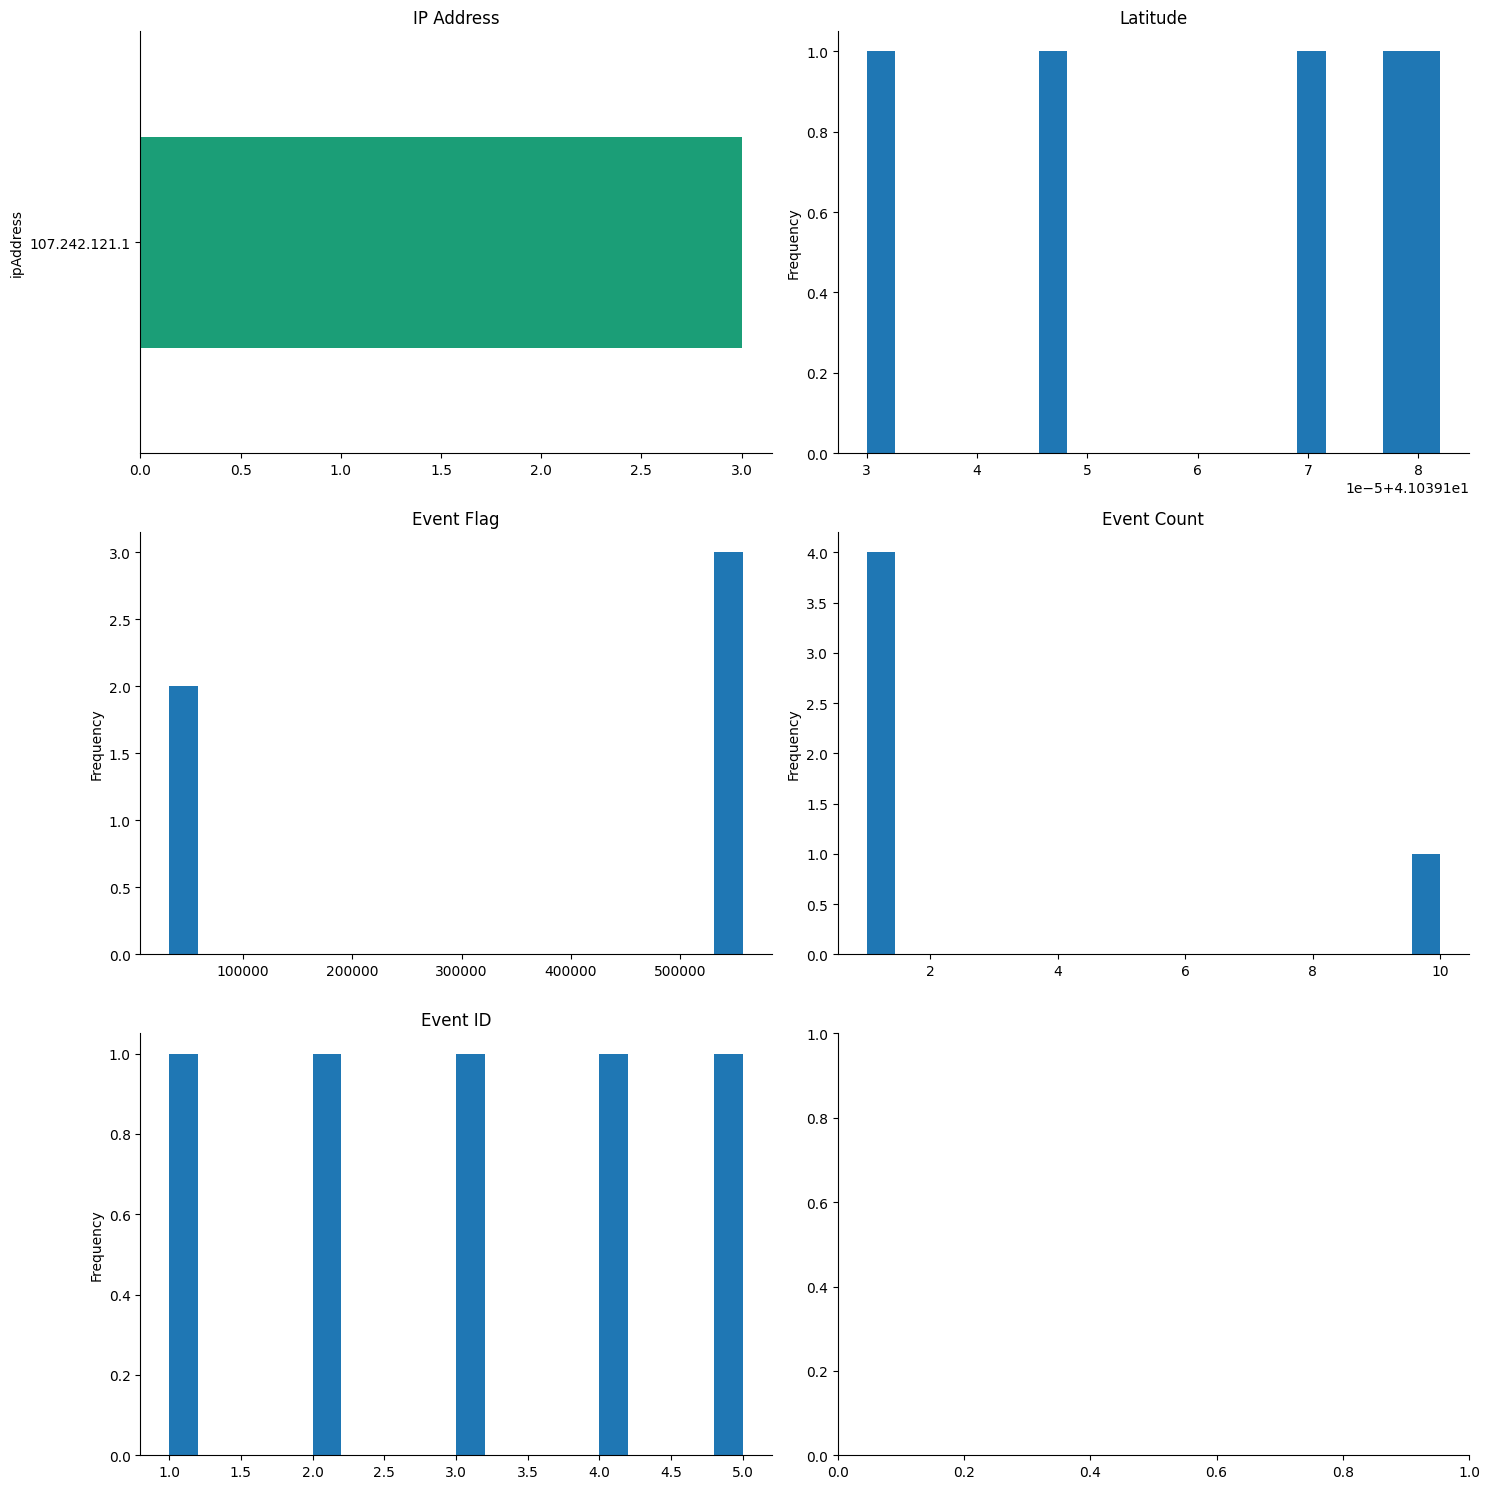

In [ ]:
# Set up subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot ipAddress
df.groupby('ipAddress').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0, 0])
axes[0, 0].set_title('IP Address')

# Plot latitude
df['latitude'].plot(kind='hist', bins=20, title='Latitude', ax=axes[0, 1])

# Plot eventFlag
df['eventFlag'].plot(kind='hist', bins=20, title='Event Flag', ax=axes[1, 0])

# Plot eventCount
df['eventCount'].plot(kind='hist', bins=20, title='Event Count', ax=axes[1, 1])

# Plot eventId
df['eventId'].plot(kind='hist', bins=20, title='Event ID', ax=axes[2, 0])

# Remove spines from all subplots
for ax_row in axes:
    for ax in ax_row:
        ax.spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


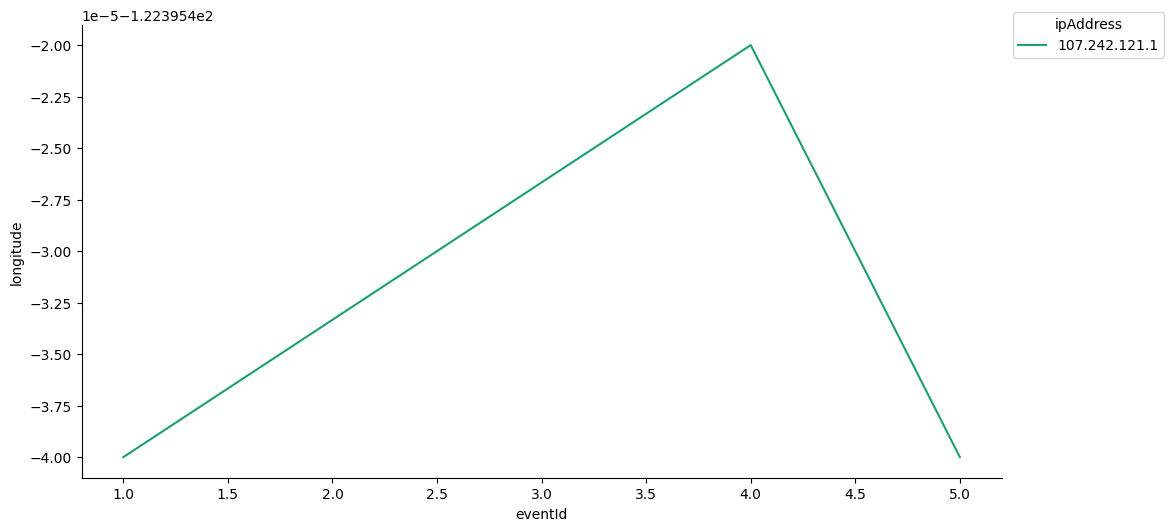

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eventId']
  ys = series['longitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('eventId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ipAddress')):
  _plot_series(series, series_name, i)
  fig.legend(title='ipAddress', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eventId')
_ = plt.ylabel('longitude')

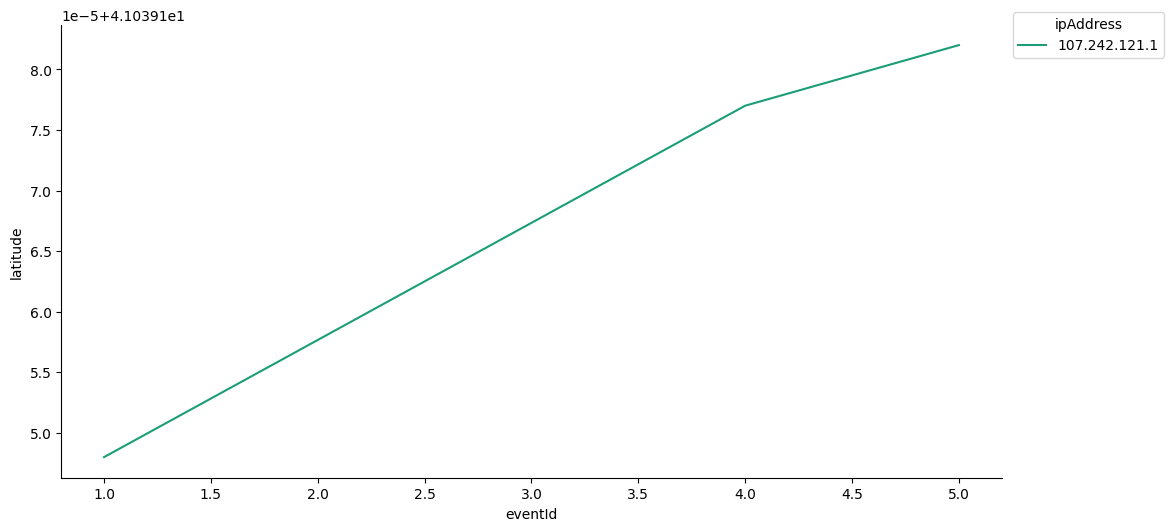

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eventId']
  ys = series['latitude']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('eventId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ipAddress')):
  _plot_series(series, series_name, i)
  fig.legend(title='ipAddress', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eventId')
_ = plt.ylabel('latitude')

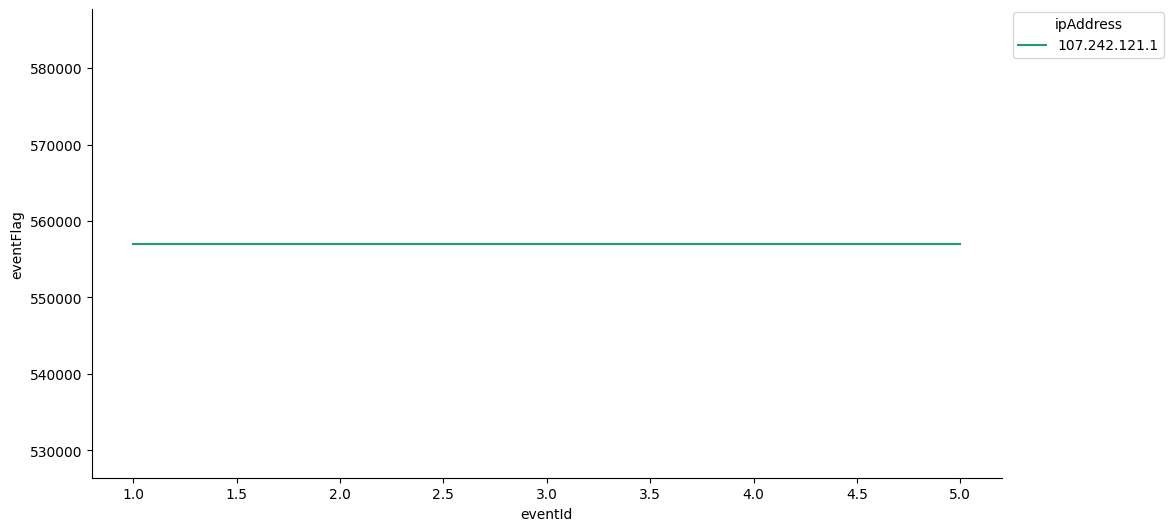

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eventId']
  ys = series['eventFlag']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('eventId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ipAddress')):
  _plot_series(series, series_name, i)
  fig.legend(title='ipAddress', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eventId')
_ = plt.ylabel('eventFlag')

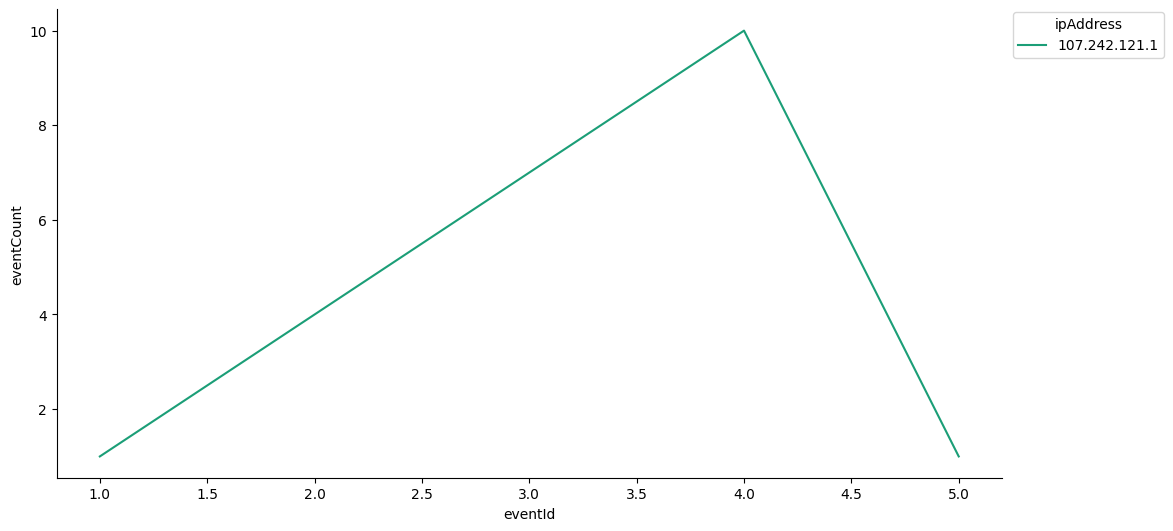

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eventId']
  ys = series['eventCount']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('eventId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ipAddress')):
  _plot_series(series, series_name, i)
  fig.legend(title='ipAddress', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eventId')
_ = plt.ylabel('eventCount')

<ipython-input-68-46649c692e6c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='eventFlag', y='ipAddress', inner='stick', palette='Dark2', ax=axes[0, 0])
<ipython-input-68-46649c692e6c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='latitude', y='ipAddress', inner='stick', palette='Dark2', ax=axes[0, 1])
<ipython-input-68-46649c692e6c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='eventCount', y='ipAddress', inner='stick', palette='Dark2', ax=axes[1, 0])
<ipython-input-68-46649c692e6c>:20:

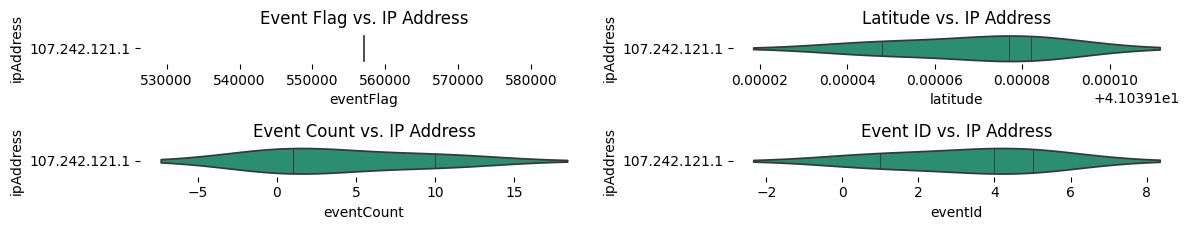

In [ ]:
# Set the figure size based on the unique number of IP addresses
figsize = (12, 1.2 * len(df['ipAddress'].unique()))

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=figsize)

# Plot eventFlag vs. ipAddress
sns.violinplot(data=df, x='eventFlag', y='ipAddress', inner='stick', palette='Dark2', ax=axes[0, 0])
axes[0, 0].set_title('Event Flag vs. IP Address')

# Plot latitude vs. ipAddress
sns.violinplot(data=df, x='latitude', y='ipAddress', inner='stick', palette='Dark2', ax=axes[0, 1])
axes[0, 1].set_title('Latitude vs. IP Address')

# Plot eventCount vs. ipAddress
sns.violinplot(data=df, x='eventCount', y='ipAddress', inner='stick', palette='Dark2', ax=axes[1, 0])
axes[1, 0].set_title('Event Count vs. IP Address')

# Plot eventId vs. ipAddress
sns.violinplot(data=df, x='eventId', y='ipAddress', inner='stick', palette='Dark2', ax=axes[1, 1])
axes[1, 1].set_title('Event ID vs. IP Address')

# Remove spines from all subplots
for ax in axes.flatten():
    sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



Geospatial Analysis:

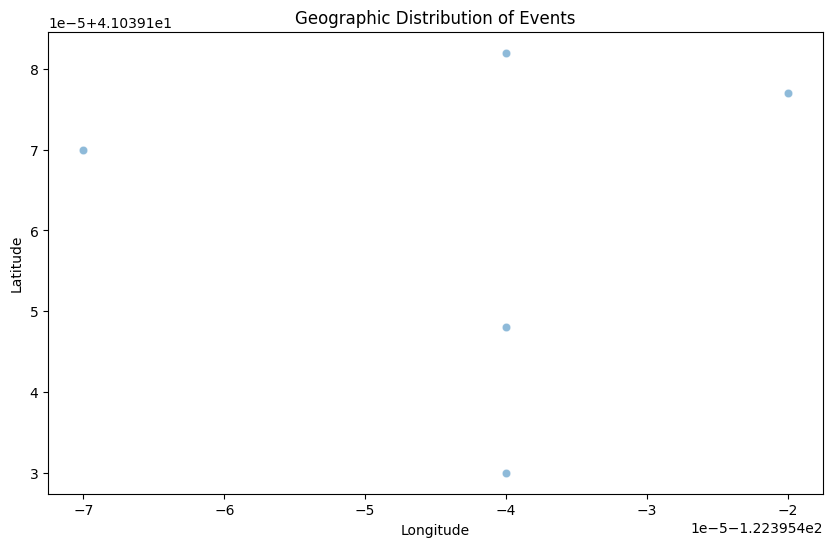

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plot using seaborn
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.5)

# Set titles and labels
plt.title('Geographic Distribution of Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


Time Series Analysis:

<ipython-input-70-261f896da985>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='timestamp', y='eventCount', data=df, estimator='sum', ci=None)


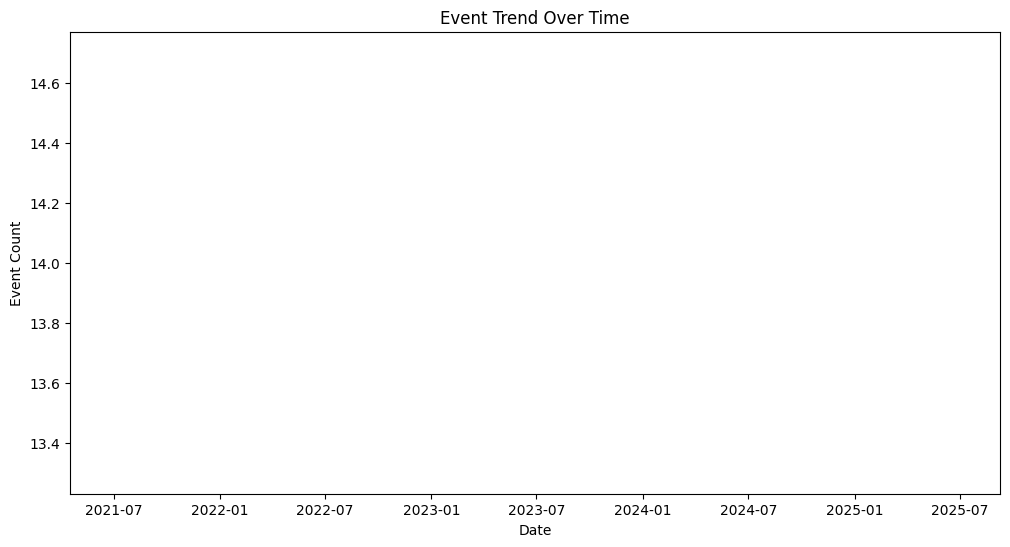

In [ ]:
# Reset index to make 'timestamp' a column again
df.reset_index(inplace=True)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot using seaborn
sns.lineplot(x='timestamp', y='eventCount', data=df, estimator='sum', ci=None)

# Set titles and labels
plt.title('Event Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Event Count')

# Show the plot
plt.show()


Correlation matrix

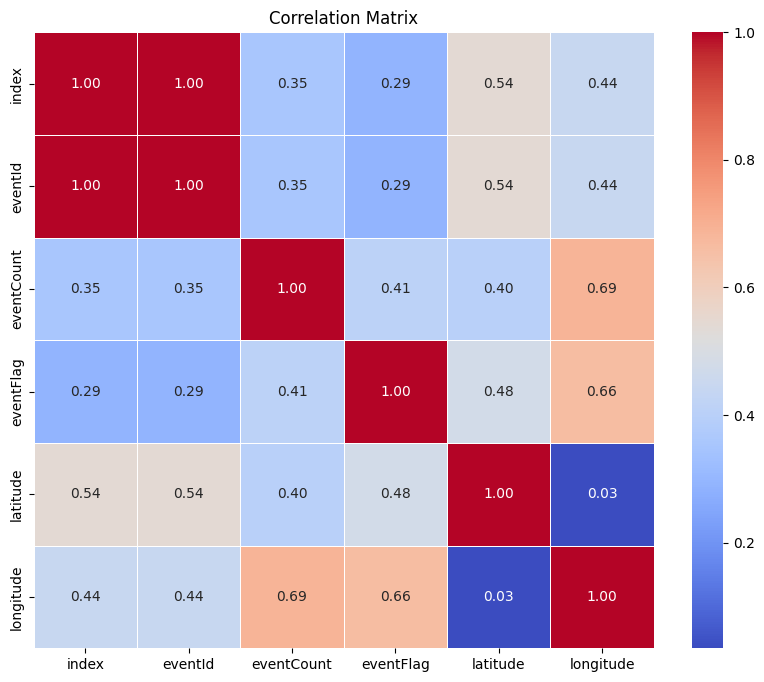

In [ ]:
# Correlation matrix

# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




Isolation Forest for anomaly detection

In [ ]:
# Example: Isolation Forest for anomaly detection

model = IsolationForest(contamination=0.01)
model.fit(df[['eventCount', 'latitude', 'longitude']])
anomalies = model.predict(df[['eventCount', 'latitude', 'longitude']])

print("Number of anomalies detected:", len(df[anomalies == -1]))


Number of anomalies detected: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


User Segmentation:

In [ ]:
def Silhouette(X_data3):
    import matplotlib.cm as cm
    from sklearn.metrics import silhouette_score, silhouette_samples

    n_clusters = [2,3,4]

    for n_cluster in n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_data3) + (n_cluster + 1) * 10])

        clusterer = KMeans(n_clusters=n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_data3)

        silhouette_avg = silhouette_score(X_data3, cluster_labels)
        print("For n_clusters =", n_cluster,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X_data3, cluster_labels)

        y_lower = 10
        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X_data3.iloc[:, 0], X_data3.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_cluster), fontsize=14, fontweight='bold')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7999966894026518
For n_clusters = 3 The average silhouette_score is : 0.32969047543888963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.22204120009101733


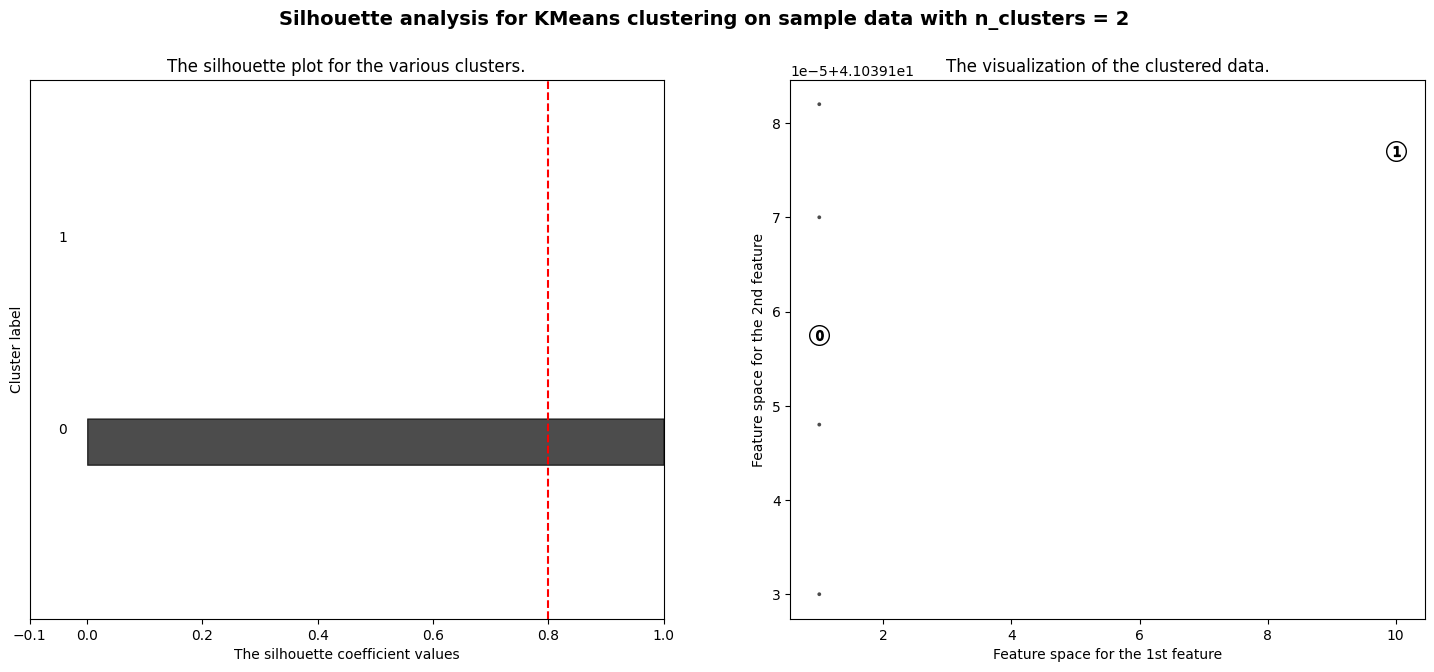

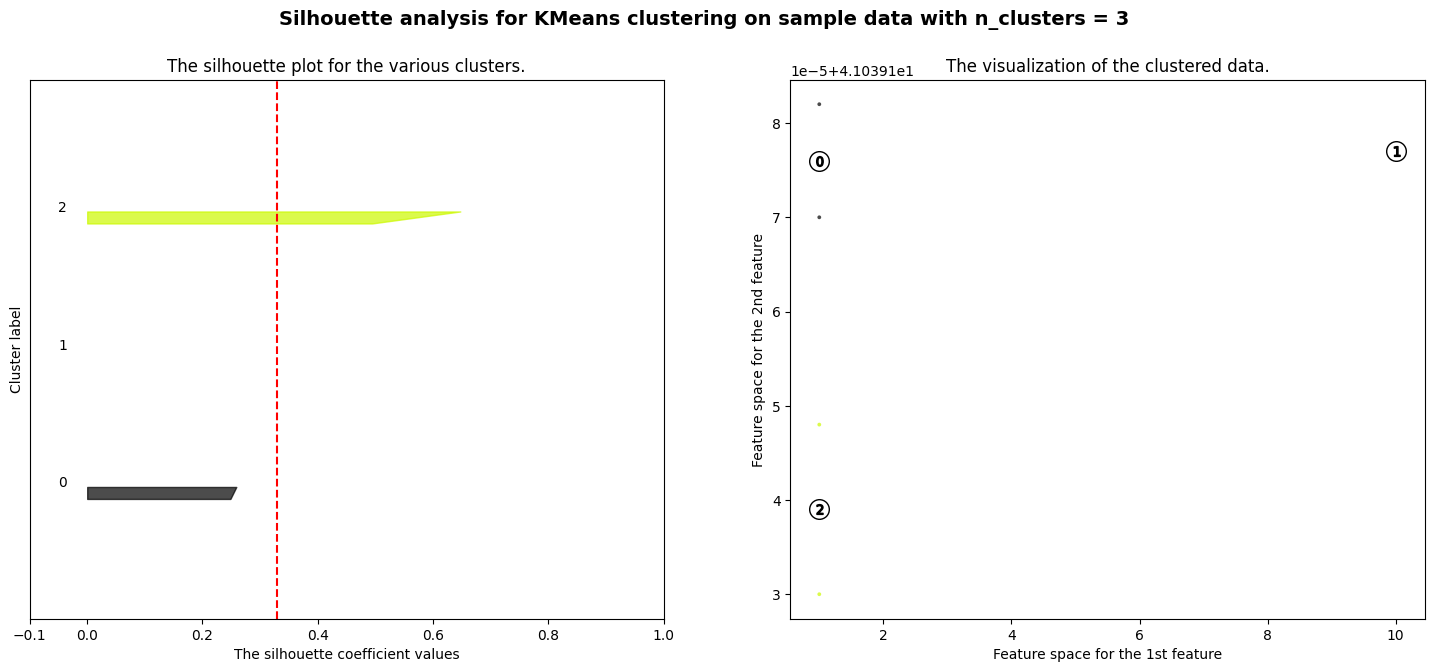

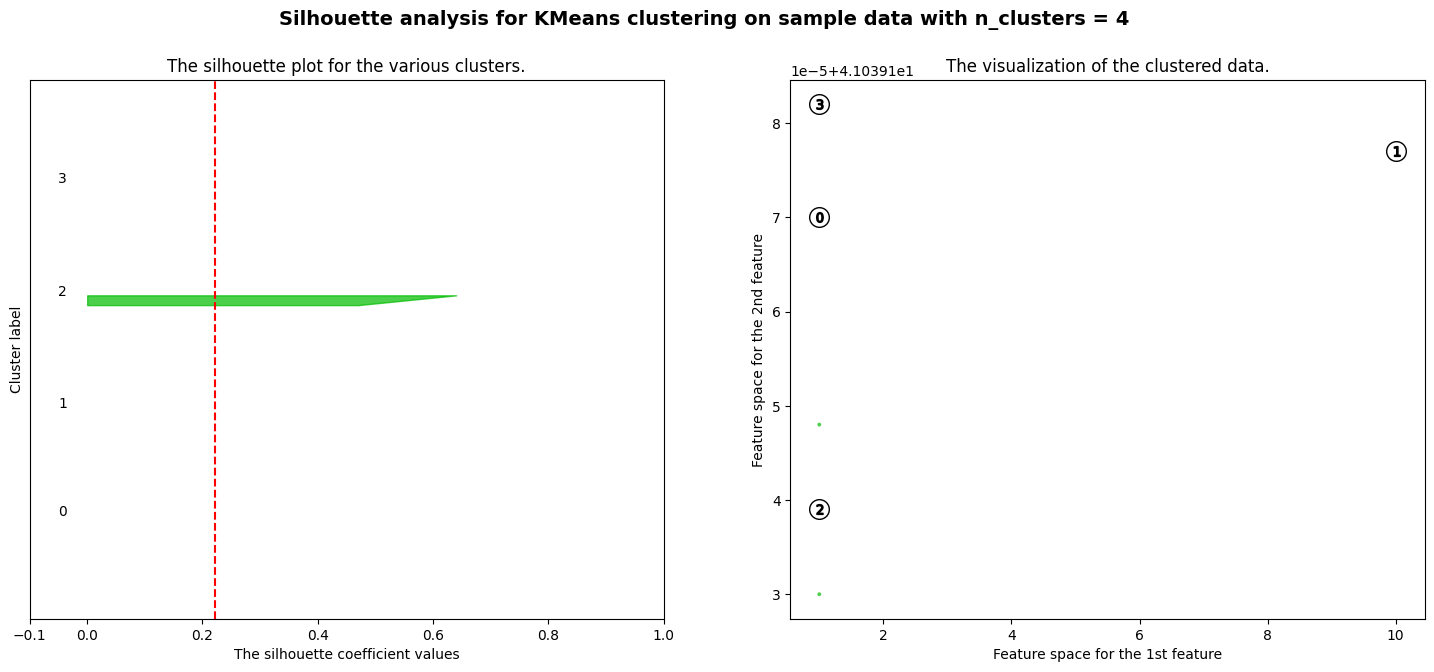

In [ ]:
X_data = df[['eventCount', 'latitude', 'longitude']]
Silhouette(X_data)

K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


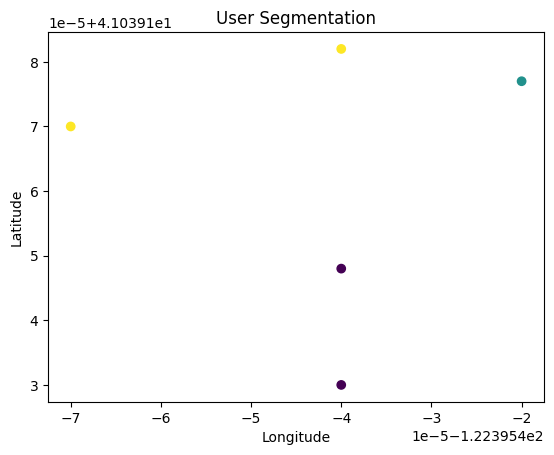

In [ ]:
# Example: K-means clustering

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['eventCount', 'latitude', 'longitude']])

# Visualize clusters
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis')
plt.title('User Segmentation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Predictive Modeling(Linear Regression):

In [ ]:
# Example: Linear Regression for event prediction

X = df[['latitude', 'longitude']]
y = df['eventCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(' Linear Regression pred value: ',y_pred)

Mean Squared Error: 182.25000040233135
 Linear Regression pred value:  [-12.50000001]


Predictive Modeling(Random Forest)

In [ ]:
# Confusion Matrix (Example: Random Forest Classifier)

# Encode categorical variables
label_encoder = LabelEncoder()
df['encoded_eventFlag'] = label_encoder.fit_transform(data['eventFlag'])

X = df[['eventCount', 'latitude', 'longitude']]
y = df['encoded_eventFlag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)
print('Random Forest Classifier pred value: ',y_pred_rf)

Confusion Matrix:
 [[0 1]
 [0 0]]
Random Forest Classifier pred value:  [1]


Prediction using a sample data point

In [ ]:
# Prediction using a sample data point
sample_data_point = [[1, 41.039148, -122.39544]]  # Example data point
predicted_event_flag = rf_classifier.predict(sample_data_point)
predicted_event_flag = label_encoder.inverse_transform(predicted_event_flag)
print("Predicted Event Flag for the sample data point:", predicted_event_flag)

Predicted Event Flag for the sample data point: [557056]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
